# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an 80/20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1a. Importing Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ds3021_cars.csv to ds3021_cars.csv


In [ ]:
cars = pd.read_csv('ds3021_cars.csv')
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


### 1b. Cleaning Data

In [ ]:
# see the basics of the data and check for missing values
print(cars.info())
print("\n")
print(cars.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB
None


Unnamed: 0           0
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity  

^ We have no missing values. Awesome!

The variable types are all either integers (can use histogram, scatterplots, etc.) or objects (categories, classification, bar charts, etc.).

In [ ]:
# remove the unnamed index column because that is irrelevant to our analysis
cars = cars.drop(columns=['Unnamed: 0'])

### 1c. EDA

In [ ]:
# starting exploratory data analysis
print(cars.describe())

         Make_Year   Mileage_Run  Seating_Capacity         Price
count   976.000000    976.000000        976.000000  9.760000e+02
mean   2016.963115  41571.195697          5.095287  7.410195e+05
std       2.818742  24390.995134          0.446224  3.673234e+05
min    2011.000000   1117.000000          4.000000  1.880000e+05
25%    2015.000000  22676.750000          5.000000  4.757500e+05
50%    2017.000000  37570.500000          5.000000  6.665000e+05
75%    2019.000000  57421.250000          5.000000  8.830000e+05
max    2022.000000  99495.000000          8.000000  2.941000e+06


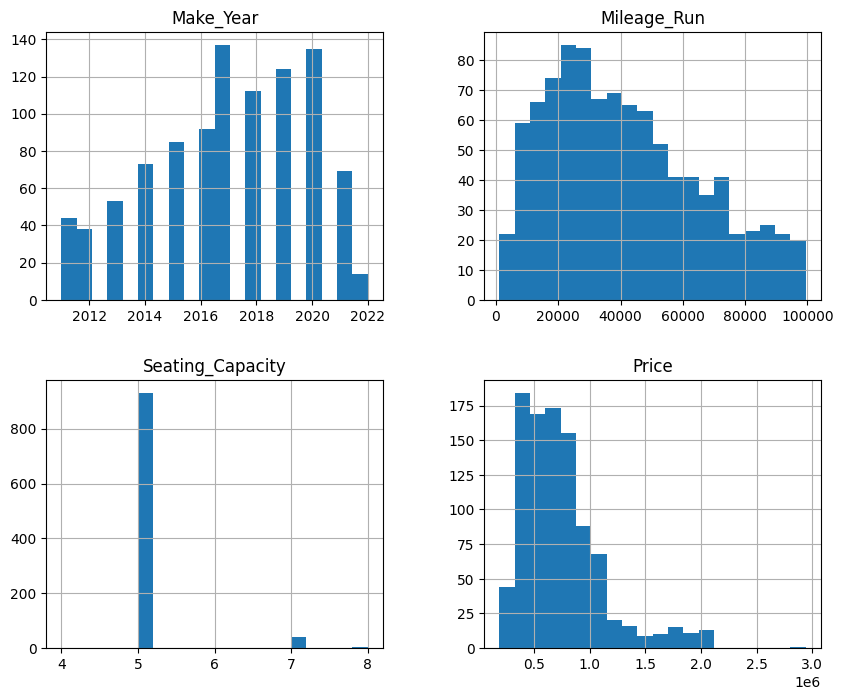

In [ ]:
# showing all the numeric variables as histograms
cars.hist(figsize=(10, 8), bins=20)
plt.show()

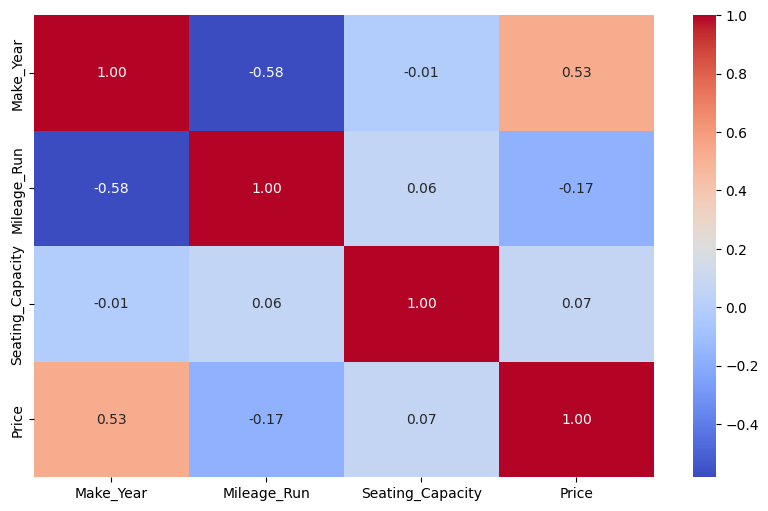

In [ ]:
# correlation heatmap
numeric_cars = cars.select_dtypes(include=['int64']) # dataframe with only the numeric variables
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cars.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Not a lot of correlation here. Let's explore the categorical data now.

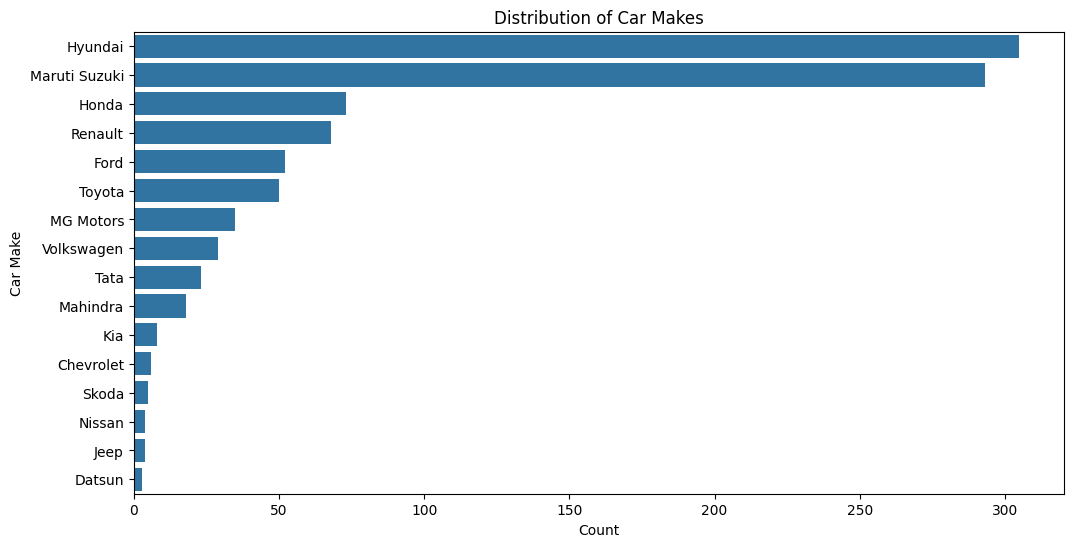

In [ ]:
# distribution of car makes (horizontal bars)
plt.figure(figsize=(12, 6))
sns.countplot(y=cars["Make"], order=cars["Make"].value_counts().index)
plt.title("Distribution of Car Makes")
plt.xlabel("Count")
plt.ylabel("Car Make")
plt.show()

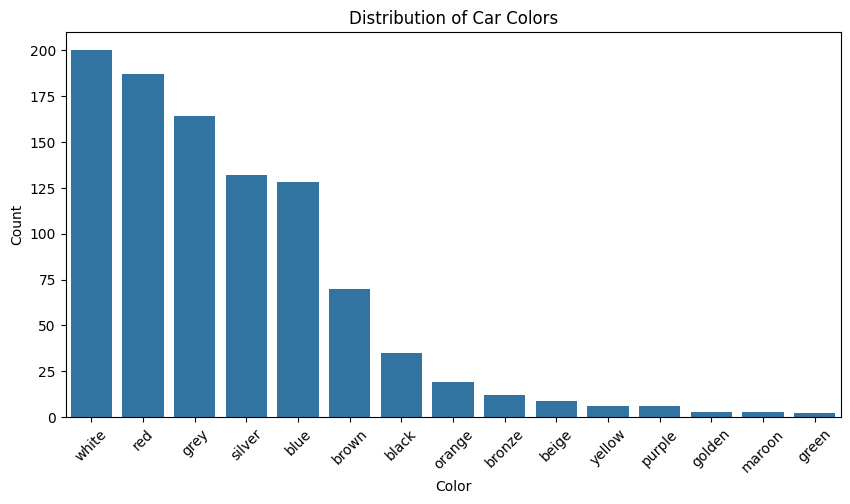

In [ ]:
# distribution of car colors (vertical bars)
plt.figure(figsize=(10, 5))
sns.countplot(x=cars["Color"], order=cars["Color"].value_counts().index)
plt.title("Distribution of Car Colors")
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

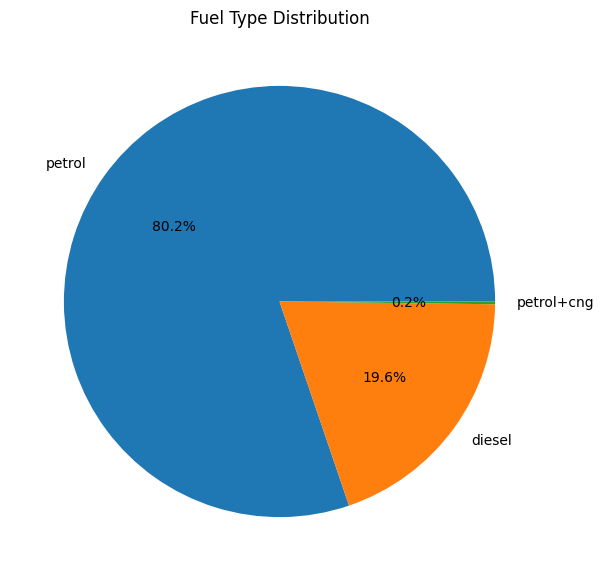

In [ ]:
# distribution of fuel type as a pie chart

fuel_counts = cars["Fuel_Type"].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%')
plt.title("Fuel Type Distribution")
plt.show()

### 2. Transforming Categorical Variables for Regression

In [ ]:
cars = pd.get_dummies(cars, drop_first=True)
cars.head()

,Make_Year,Mileage_Run,Seating_Capacity,Price,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,...,Body_Type_suv,No_of_Owners_2nd,No_of_Owners_3rd,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual
0,2017,44611,5,657000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2016,20305,5,682000,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
2,2019,29540,5,793000,False,False,True,False,False,False,...,True,True,False,True,False,True,False,False,False,True
3,2017,35680,5,414000,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2017,25126,5,515000,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True


###3. Train-Test 80/20 Split

In [ ]:
from sklearn.model_selection import train_test_split
X = cars.drop(columns=['Price'])  # i want to use 'price' as the variable we're trying to predict
y = cars['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress_grid
X_train = X_train.astype(int) # this makes sure the boolean (true/false) variables can be read

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients:\n", lr.coef_, "\n")
print("Intercept:", lr.intercept_)

Coefficients:
 [ 4.25020604e+04 -5.44486591e-01  1.16922805e+05  6.03896254e+04
  3.35985708e+04  1.81593461e+05  1.82292920e+05  5.77376761e+05
  5.99888490e+05  8.45027425e+05  3.92593090e+04  1.36577477e+05
  1.15804957e+05 -5.34163832e+03  6.57767495e+05  2.64050796e+05
  2.18862322e+05  1.36605690e+05  2.20753464e+05  1.97163372e+05
  1.22988829e+05  2.01524725e+05  1.50200690e+05  2.45918382e+05
  1.72230873e+05  1.98901729e+05  1.90933019e+05  2.09670696e+04
  1.84462891e+05  1.58657720e+05  1.84257264e+05  1.01222438e+05
 -1.11604945e+05 -2.16616668e+05  7.30245942e+04  1.79651747e+05
 -3.80482347e+04 -1.27272477e+05 -1.37920841e+05 -2.21405094e+05
  2.67674066e+04  1.47416519e+05  3.37087018e+05  8.67418974e+04
 -2.84691177e+04] 

Intercept: -85818909.15250565


In [ ]:
# making predictions and seeing the first 5 predictions
y_train_pred = lr.predict(X_train)
print("y_train predictions:\n", y_train_pred[:5])
print("\n")
y_test_pred = lr.predict(X_test)
print("y_test predictions:\n", y_test_pred[:5])

y_train predictions:
 [ 990547.71495488  327971.08916692 1109395.90625918  615805.95086974
  746036.42851153]


y_test predictions:
 [ 330643.06384005  627584.06020053  573589.34795071  429689.9533195
 1437544.28439388]


In [ ]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Simple Linear Model - Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Simple Linear Model - Train R²: {train_r2}, Test R²: {test_r2}")

Simple Linear Model - Train RMSE: 142114.26056968494, Test RMSE: 143575.1966058975
Simple Linear Model - Train R²: 0.8553060847751646, Test R²: 0.8202733305989025


I think this is great! The training and testing data are giving extremely similar results. The linear regression model is a success!

###5. Partial Correlation Plots

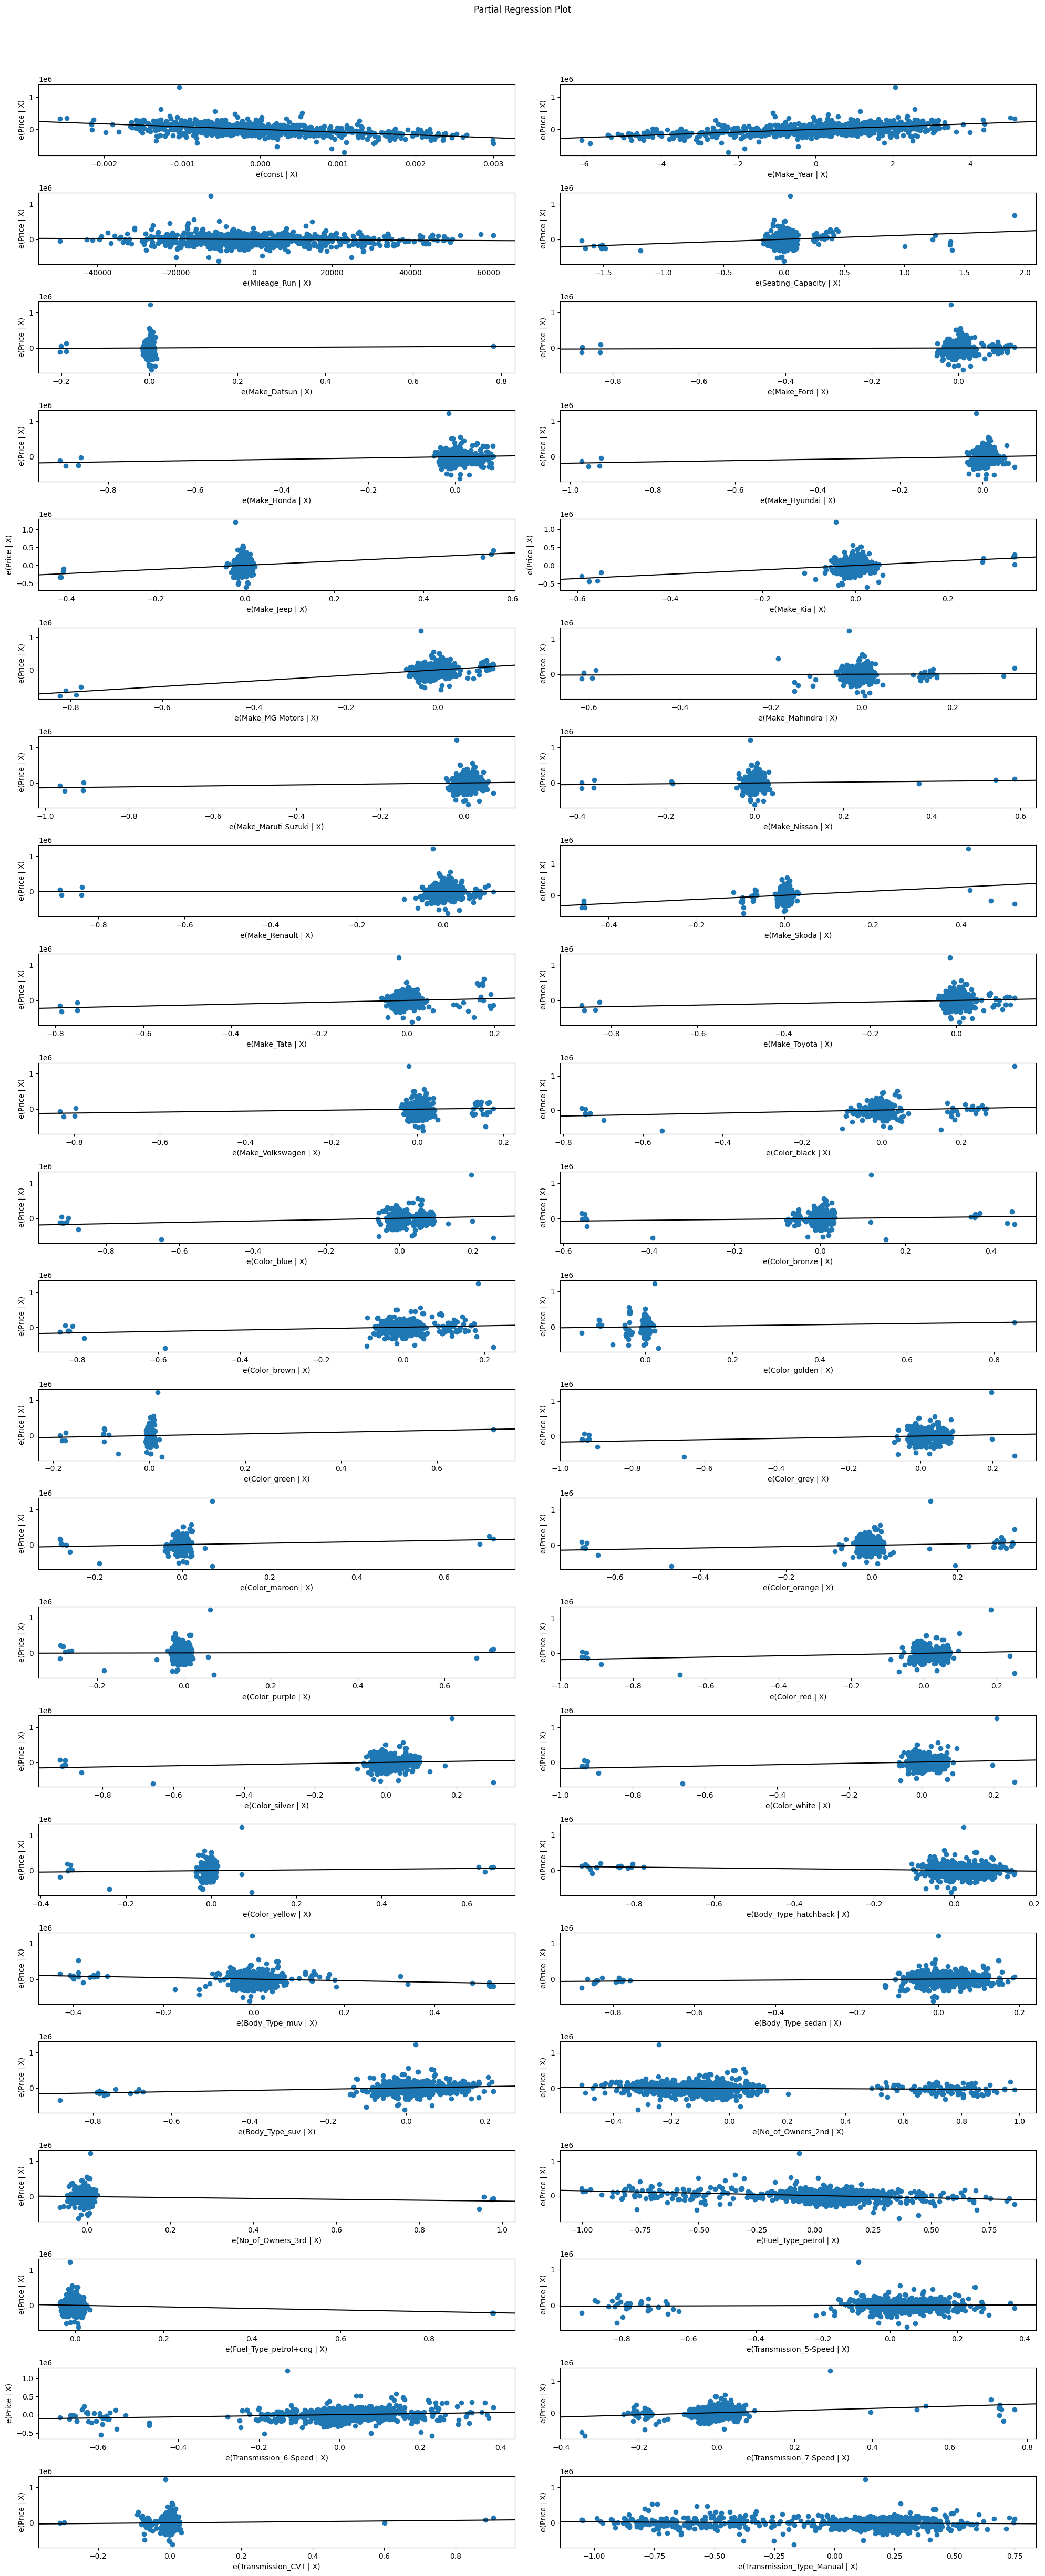

In [71]:
X_train_sm = sm.add_constant(X_train)  # add constant for statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()
fig = plt.figure(figsize=(20, 50))
plot_partregress_grid(model_sm, fig=fig)
plt.show()

Except for the variables that are clustered as one group, they all look pretty linear to me.

###6. Polynomial Support Vector Regression Model

In [79]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [81]:
#scaling the data for svr
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

In [82]:
#reshaping y
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = sc_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [83]:
#fitting the polynomial svr model
svr_poly = SVR(kernel='poly', degree=2, C=1000, epsilon=0.1)  # polynomial kernel (degree 2)
svr_poly.fit(X_train_scaled, y_train_scaled)

SVR(C=1000, degree=2, kernel='poly')

In [86]:
# making predictions and seeing the first 5 predictions
y_train_poly_pred = sc_y.inverse_transform(svr_poly.predict(X_train_scaled).reshape(-1, 1)) #reshape to 2d array
print("y_train polynomial svr predictions:\n", y_train_pred[:5])
print("\n")
y_test_poly_pred = sc_y.inverse_transform(svr_poly.predict(X_test_scaled).reshape(-1, 1))
print("y_test polynomial svr predictions:\n", y_test_pred[:5])

y_train polynomial svr predictions:
 [ 990547.71495488  327971.08916692 1109395.90625918  615805.95086974
  746036.42851153]


y_test polynomial svr predictions:
 [ 330643.06384005  627584.06020053  573589.34795071  429689.9533195
 1437544.28439388]


In [88]:
train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_train_poly_pred))
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_test_poly_pred))
train_r2_poly = r2_score(y_train, y_train_poly_pred)
test_r2_poly = r2_score(y_test, y_test_poly_pred)

print(f"Polynomial Regression Model - Train RMSE: {train_rmse_poly}, Test RMSE: {test_rmse_poly}")
print(f"Polynomial Regression Model - Train R²: {train_r2_poly}, Test R²: {test_r2_poly}")

Polynomial Regression Model - Train RMSE: 80387.55622107115, Test RMSE: 742297.8979485296
Polynomial Regression Model - Train R²: 0.953703026509755, Test R²: -3.8040790873226236


Wow, the SVR model above really did not predict well on our testing set! However, we do see that with the more complex polynomial svr model the R^2 and RMSE of the training data is significantly better than that of the linear regression model, which suggests that the SVR model overfitted to the training data and thus cannot predict with the testing data at all.

###7. What We Learned

This all shows us that just because a model is more complex doesn't necessarily mean it's better; we have to consider both the risk of overfitting and underfitting and choose the model that would best fit the visual trends of our data and not the model that can 'fit' the best because of its complexity. As we can see above, the linear regression model worked as well as one could hope, while the polynomial svr model crashed and burned and literally could not provide a prediction that was remotely accurate.